# Notebook to compute ocean heat content

Call to the reader and retrieve data

In [1]:
from aqua import Reader
import numpy as np
from ocean_heat_functions import compute_net_surface_fluxes, plot_time_series

In [10]:
model="IFS-NEMO"
exp="historical-1990"
source="lra-r100-monthly"
reader = Reader(model=model, exp=exp, source=source)
data = reader.retrieve()

2024-02-15 18:24:22 :: Reader :: ERROR    -> The requested deafult fixer name IFS-NEMO-default does not exist in fixes files
2024-02-15 18:24:22 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
/LUMI_TYKKY_vySdJkU/miniconda/envs/env1/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


Select date range

In [8]:
startdate = "1990-01-01"
enddate = "1998-12-31"
data=data.sel(time=slice(startdate, enddate))

Net surface fluxes at the ocean surface are:
mslhf, msnlwrf, msnswrf, msshf
If integrated over the whole ocean surface, they should be equal to the net heat flux at the ocean surface (hfds)
or the heat/sources/sinks in the ocean (hfds - hfss)

In [11]:
#computes net surface fluxes at the ocean surface including land sea mask
net_surface_fluxes, mask = compute_net_surface_fluxes(data)
# compute the time series of the net surface fluxes
net_surface_fluxes = reader.fldmean(net_surface_fluxes)


In [12]:
# get the heat content of the 700m ocean layer and perform spatial averaging
avg_hc700m = data['avg_hc700m']
avg_hc700m=reader.fldmean(avg_hc700m)
# compute time derivative of the heat content
time_diff = np.diff(avg_hc700m.time.values, axis=0) / np.timedelta64(1, 's')
avg_hc_time_derivative = np.diff(avg_hc700m, axis=0) / time_diff


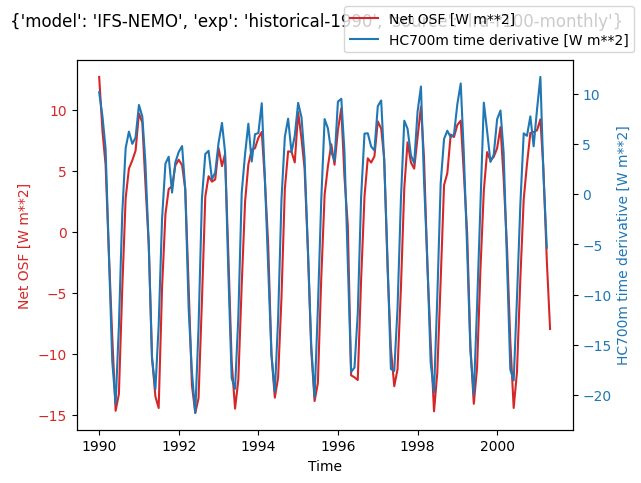

In [13]:
title_args = {'model': model, 'exp': exp, 'source': source}
plot_time_series(net_surface_fluxes, avg_hc_time_derivative, title=title_args, var1_label="Net OSF [W m**2]",  var2_label="HC700m time derivative [W m**2]")